In [1]:
import numpy as np
import IPython
import matplotlib.pyplot as plt

import scipy.signal
from scipy.io.wavfile import write

In [2]:
def downsample2(x0):
    return x0[1::2]

In [3]:
def lowpass(cutoff, fs, order=50):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = scipy.signal.iirfilter(order, normal_cutoff, btype='low', ftype='butter')
    return b, a

In [4]:
def highpass(cutoff, fs, order=50):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = scipy.signal.iirfilter(order, normal_cutoff, btype='high', ftype='butter')
    return b, a

In [5]:
fs=8e3
cutoff=2e3
n=2**12

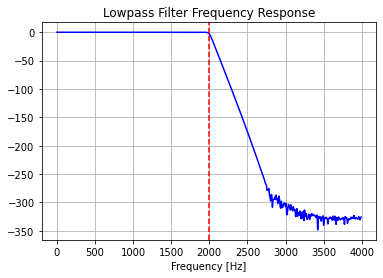

In [6]:
b, a = lowpass(cutoff, fs)
w, h = scipy.signal.freqz(b, a, fs=fs)
plt.plot(w, 20*np.log10(np.abs(h)), 'b')
plt.axvline(cutoff, color='r', linestyle='--')
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

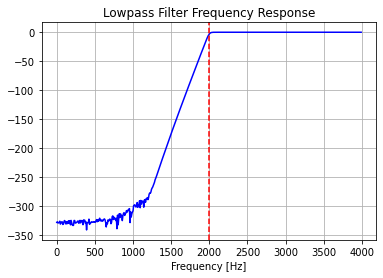

In [7]:
b, a = highpass(cutoff, fs)
w, h = scipy.signal.freqz(b, a, fs=fs)
plt.plot(w, 20*np.log10(np.abs(h)), 'b')
plt.axvline(cutoff, color='r', linestyle='--')
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

In [8]:
fs = 8e3
dt = 1/fs
time = np.arange(0, 5, dt)

f1 = 880 - 20*np.sin(2*np.pi*5*time)
f2 = 2*f1
f3 = 3*f1
f4 = 4*f1

delta_phase1 = 2*np.pi*f1*dt
delta_phase2 = 2*np.pi*f2*dt
delta_phase3 = 2*np.pi*f3*dt
delta_phase4 = 2*np.pi*f4*dt

phase1 = np.cumsum(delta_phase1)
phase2 = np.cumsum(delta_phase2)
phase3 = np.cumsum(delta_phase3)
phase4 = np.cumsum(delta_phase4)

sin1 = np.sin(phase1)
sin2 = np.sin(phase2)
sin3 = np.sin(phase3)
sin4 = np.sin(phase4)

x0 = sin1 + sin2 + sin3 + sin4
x0 = x0/max(x0)

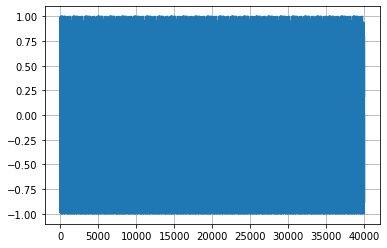

In [9]:
plt.plot(x0)
plt.grid()
plt.show()

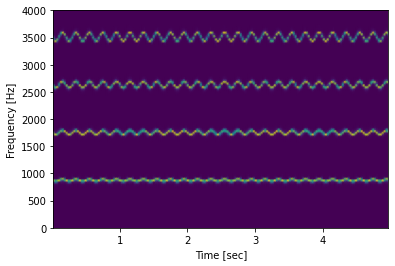

In [10]:
f, t, Sxx = scipy.signal.spectrogram(x0, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [11]:
write(filename='signal_vibrato.wav', # Nome do arquivo
rate=int(fs), # Taxa de amostragem
data=x0.astype(np.float32)) # Sinal amostrado

In [12]:
# Reproduzindo o arquivo WAV
IPython.display.Audio('signal_vibrato.wav')

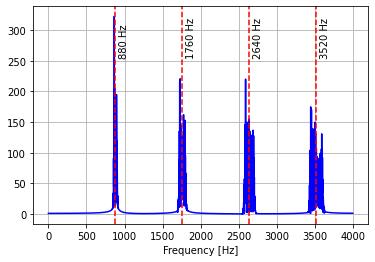

In [13]:
s = scipy.fft.fft(x0, n=n)
s = s[:n//2]
w = np.linspace(0, fs/2, num=n//2)

shift_text = 50
plt.plot(w, np.abs(s), 'b')
plt.axvline(880, color='r', linestyle='--')
plt.text(880+shift_text, 0.8*np.max(np.abs(s)), '880 Hz', rotation=90)
plt.axvline(880*2, color='r', linestyle='--')
plt.text(1760+shift_text, 0.8*np.max(np.abs(s)), '1760 Hz', rotation=90)
plt.axvline(880*3, color='r', linestyle='--')
plt.text(2640+shift_text, 0.8*np.max(np.abs(s)), '2640 Hz', rotation=90)
plt.axvline(880*4, color='r', linestyle='--')
plt.text(3520+shift_text, 0.8*np.max(np.abs(s)), '3520 Hz', rotation=90)
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

## First decomposition (Low frequencies)

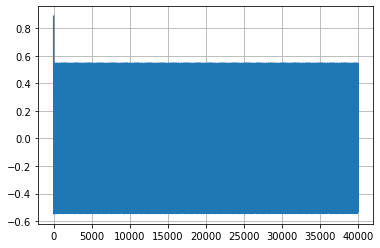

In [14]:
b, a = lowpass(fs/4, fs)
f1 = scipy.signal.filtfilt(b, a, x0)
plt.plot(f1)
plt.grid()
plt.show()

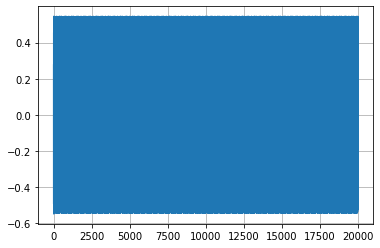

In [15]:
x1_l = downsample2(f1)
plt.plot(x1_l)
plt.grid()
plt.show()

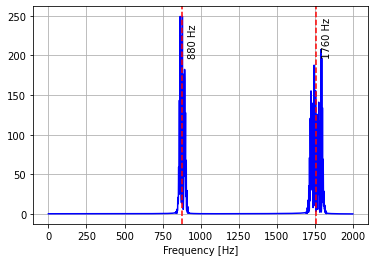

In [16]:
s = scipy.fft.fft(x1_l, n=n)
s = s[:n//2]
w = np.linspace(0, fs/4, num=n//2)

shift_text = 40
plt.plot(w, np.abs(s), 'b')
plt.axvline(880, color='r', linestyle='--')
plt.text(880+shift_text, 0.8*np.max(np.abs(s)), '880 Hz', rotation=90)
plt.axvline(880*2, color='r', linestyle='--')
plt.text(1760+shift_text, 0.8*np.max(np.abs(s)), '1760 Hz', rotation=90)
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

## First decomposition (High frequencies)

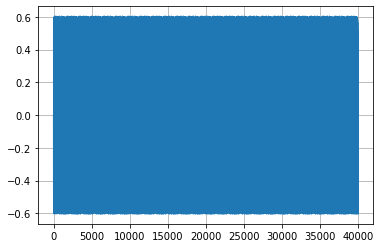

In [17]:
b, a = highpass(fs/4, fs)
g1 = scipy.signal.filtfilt(b, a, x0)
plt.plot(g1)
plt.grid()
plt.show()

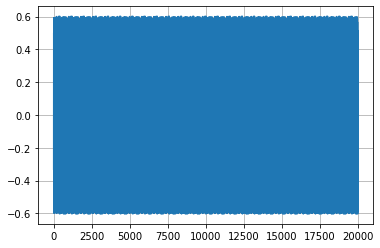

In [18]:
x1_h = downsample2(g1)
plt.plot(x1_h)
plt.grid()
plt.show()

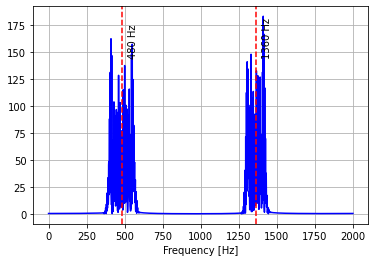

In [19]:
s = scipy.fft.fft(x1_h, n=n)
s = s[:n//2]
w = np.linspace(0, fs/4, num=n//2)

shift_text = 40
plt.plot(w, np.abs(s), 'b')
plt.axvline(1360, color='r', linestyle='--')
plt.text(1360+shift_text, 0.8*np.max(np.abs(s)), '1360 Hz', rotation=90)
plt.axvline(480, color='r', linestyle='--')
plt.text(480+shift_text, 0.8*np.max(np.abs(s)), '480 Hz', rotation=90)
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

## Second decomposition (Low frequencies of low frequencies)

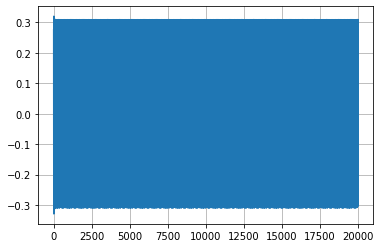

In [20]:
b, a = lowpass(fs/8, fs/2)
f2_l = scipy.signal.filtfilt(b, a, x1_l)
plt.plot(f2_l)
plt.grid()
plt.show()

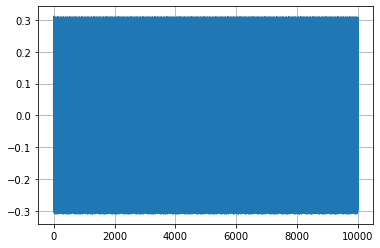

In [21]:
x2_ll = downsample2(f2_l)
plt.plot(x2_ll)
plt.grid()
plt.show()

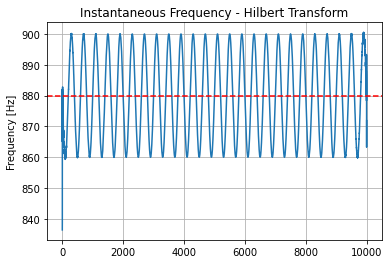

In [22]:
analytic_signal = scipy.signal.hilbert(x2_ll)
inst_phase = np.unwrap(np.angle(analytic_signal))
inst_freq = (np.diff(inst_phase)/(2.0*np.pi)*(fs/4))

shift_text = 5
plt.plot(inst_freq)
plt.axhline(880, color='r', linestyle='--')
#plt.text(len(inst_freq)/2, 880+shift_text, '880 Hz')
plt.ylabel('Frequency [Hz]')
plt.title('Instantaneous Frequency - Hilbert Transform')
plt.grid()
plt.show()

## Second decomposition (High frequencies of low frequencies)

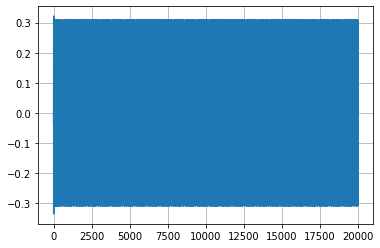

In [23]:
b, a = highpass(fs/8, fs/2)
f2_h = scipy.signal.filtfilt(b, a, x1_l)
plt.plot(f2_h)
plt.grid()
plt.show()

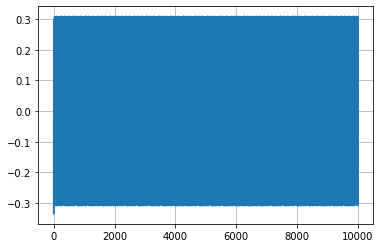

In [24]:
x2_hl = downsample2(f2_h)
plt.plot(x2_hl)
plt.grid()
plt.show()

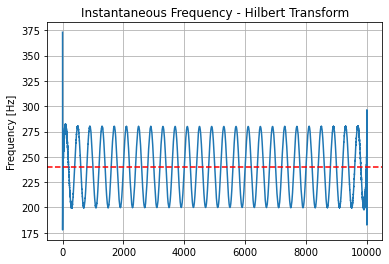

In [25]:
analytic_signal = scipy.signal.hilbert(x2_hl)
inst_phase = np.unwrap(np.angle(analytic_signal))
inst_freq = (np.diff(inst_phase)/(2.0*np.pi)*(fs/4))

shift_text = 20
plt.plot(inst_freq)
plt.axhline(240, color='r', linestyle='--')
#plt.text(len(inst_freq)/2, 240+shift_text, '240 Hz')
plt.ylabel('Frequency [Hz]')
plt.title('Instantaneous Frequency - Hilbert Transform')
plt.grid()
plt.show()

## Second decomposition (Low frequencies of high frequencies)

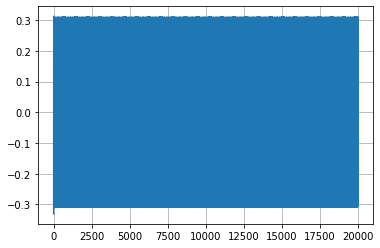

In [26]:
b, a = lowpass(fs/8, fs/2)
g2_l = scipy.signal.filtfilt(b, a, x1_h)
plt.plot(g2_l)
plt.grid()
plt.show()

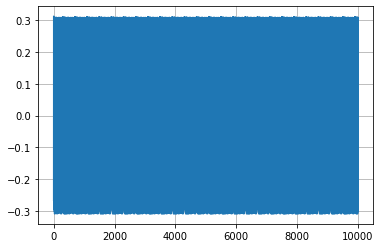

In [27]:
x2_lh = downsample2(g2_l)
plt.plot(x2_lh)
plt.grid()
plt.show()

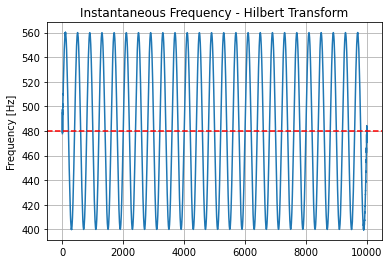

In [28]:
analytic_signal = scipy.signal.hilbert(x2_lh)
inst_phase = np.unwrap(np.angle(analytic_signal))
inst_freq = (np.diff(inst_phase)/(2.0*np.pi)*(fs/4))

shift_text = 10
plt.plot(inst_freq)
plt.axhline(480, color='r', linestyle='--')
#plt.text(len(inst_freq)/2, 480+shift_text, '480 Hz')
plt.ylabel('Frequency [Hz]')
plt.title('Instantaneous Frequency - Hilbert Transform')
plt.grid()
plt.show()

## Second decomposition (High frequencies of high frequencies)

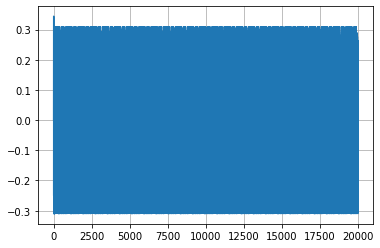

In [29]:
b, a = highpass(fs/8, fs/2)
g2_h = scipy.signal.filtfilt(b, a, x1_h)
plt.plot(g2_h)
plt.grid()
plt.show()

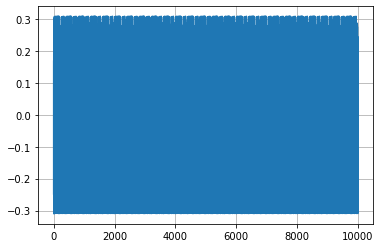

In [30]:
x2_hh = downsample2(g2_h)
plt.plot(x2_hh)
plt.grid()
plt.show()

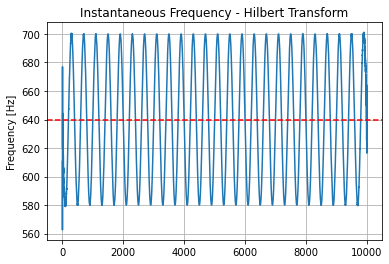

In [31]:
analytic_signal = scipy.signal.hilbert(x2_hh)
inst_phase = np.unwrap(np.angle(analytic_signal))
inst_freq = (np.diff(inst_phase)/(2.0*np.pi)*(fs/4))

shift_text = 20
plt.plot(inst_freq)
plt.axhline(640, color='r', linestyle='--')
#plt.text(len(inst_freq)/2, 640+shift_text, '640 Hz')
plt.ylabel('Frequency [Hz]')
plt.title('Instantaneous Frequency - Hilbert Transform')
plt.grid()
plt.show()